In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
HR_df=pd.read_csv('C:/Users/saliynr/Downloads/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
HR_df.head(5)

HR_df.shape # 1470 rows & 35 columns

HR_df.info() # 35 columns, 26 int & 9 objects, no missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
#Missing data can also be checked using 
HR_df.isnull().sum().sort_values(ascending=False)

#Incase there are missing values and if the percentage is less, those can be dropped using 
HR_df = HR_df.drop(HR_df[HR_df.isnull().any(1)].index, axis = 0)

In [5]:
HR_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
HR_df=HR_df.drop(['EmployeeCount','StandardHours'],axis=1)


In [7]:
# Lets convert Attrition Column into numerical values
predict = {'Yes':1, 'No':0}
# Using lambda function to perform convertion
HR_df["Attrition_num"] = HR_df["Attrition"].apply(lambda n: predict[n])

In [8]:
#Dropping original attrition column
HR_df=HR_df.drop(['Attrition'],axis=1)

In [9]:
HR_df.shape

(1470, 33)

0    1233
1     237
Name: Attrition_num, dtype: int64


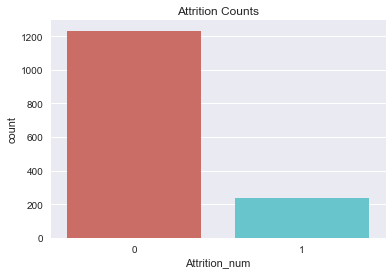

In [10]:
#Check the target variable counts and plot the same

print(HR_df['Attrition_num'].value_counts())

sns.countplot(x='Attrition_num',data=HR_df, palette='hls')
plt.title('Attrition Counts')
plt.savefig('C:/Users/saliynr/Downloads/ibm-hr-analytics-employee-attrition-performance/count_plot.png',transparent=True,bbox_inches='tight',dpi=300)

plt.show()

In [11]:
#HR_df.groupby('Department').Attrition.value_counts().unstack().fillna(0)
HR_df.groupby('Department').Attrition_num.value_counts(normalize=True).unstack().fillna(0) * 100 #-- To see the values in percentage


Attrition_num,0,1
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [12]:
HR_df.groupby('Gender').Attrition_num.value_counts(normalize=True).unstack().fillna(0)

Attrition_num,0,1
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068


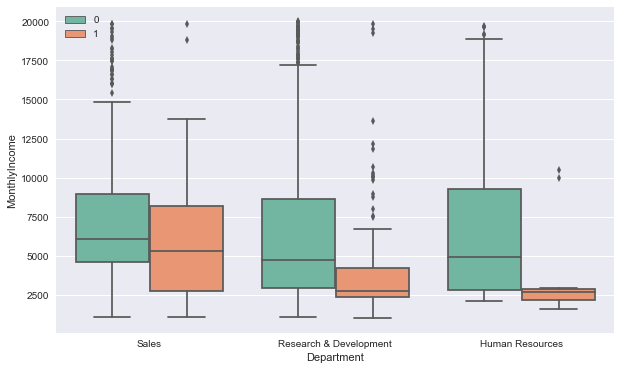

In [13]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x = 'Department',y = 'MonthlyIncome',data=HR_df, hue='Attrition_num',palette='Set2')
plt.legend(loc='upper left')
plt.show()

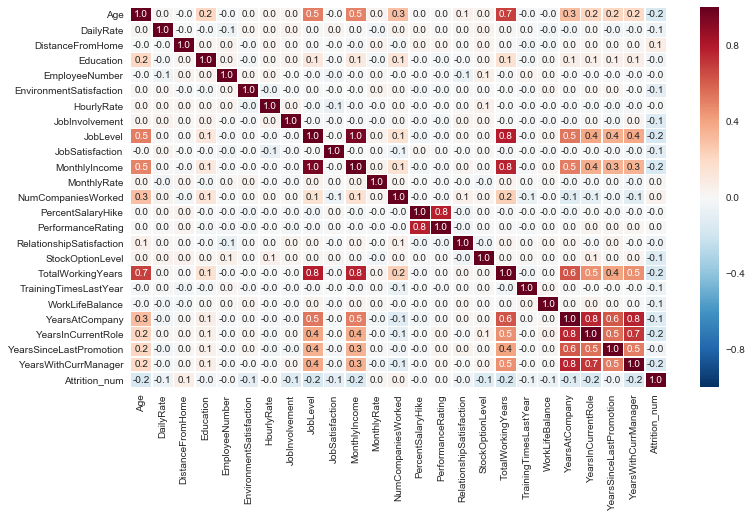

In [14]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(12, 7))
sns.heatmap(HR_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [15]:
#Dropping JobLevel as it is highly correlated with many features
HR_df=HR_df.drop(['JobLevel'],axis=1)

In [16]:
object_col=list(HR_df.select_dtypes(include=['object']).columns)

object_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [17]:
#Here they will be encoded as 0,1 & 2 respectively

# Change the type of the "BusinessTravel" column to categorical
HR_df.BusinessTravel = HR_df.BusinessTravel.astype('category')

# Provide the correct order of categories
HR_df.BusinessTravel = HR_df.BusinessTravel.cat.reorder_categories(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'])

# Encode categories
HR_df.BusinessTravel = HR_df.BusinessTravel.cat.codes

In [18]:
object_col=object_col.remove('BusinessTravel')

In [19]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null int8
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
Over18                   

In [20]:
df_dum = pd.get_dummies( HR_df, columns = object_col,drop_first=True)

In [21]:
df_dum.sample(3)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1461,50,2,410,28,3,2055,4,39,2,1,...,0,0,0,0,0,1,0,0,0,1
1303,47,2,1001,4,3,1827,3,92,2,2,...,0,0,1,0,0,0,0,0,0,1
1061,24,0,830,13,2,1495,4,78,3,2,...,0,0,0,0,0,0,1,1,0,0


In [22]:
X= df_dum.iloc[:,df_dum.columns!='Attrition_num']
y = df_dum['Attrition_num'].values

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# SMOTE - (Synthetic Minority Oversampling Technique)

At a high level, SMOTE creates synthetic observations of the minority class by:

1.Finding the k-nearest-neighbors for minority class observations (finding similar observations).

2.Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [24]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(unique_elements,counts_elements)

[0 1] [863 166]


In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train, y_train= sm.fit_sample(X_train, y_train)

In [26]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(unique_elements,counts_elements)

[0 1] [863 863]


In [27]:
y_train.shape

(1726,)

In [28]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 3
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

In [29]:
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.77


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       370
           1       0.32      0.37      0.34        71

   micro avg       0.77      0.77      0.77       441
   macro avg       0.60      0.61      0.60       441
weighted avg       0.79      0.77      0.78       441

[[315  55]
 [ 45  26]]


In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
from sklearn import tree
#from subprocess import check_call
from IPython.display import Image
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(dt,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = X.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
#check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

Image(f.create_png())

# Annotating chart with PIL
#img = Image.open("tree1.png")
#draw = ImageDraw.Draw(img)
#img.save('sample-out.png')
#PImage("sample-out.png", height=2000, width=1900)

AttributeError: 'NoneType' object has no attribute 'create_png'

In [56]:
import pydotplus
import collections
# Visualize data
dot_data = tree.export_graphviz(dt,
                                feature_names=X.columns.values,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

In [60]:
tree.export_graphviz(dt,feature_names=X.columns.values,
out_file='C:/Users/saliynr/Downloads/ibm-hr-analytics-employee-attrition-performance/tree.png')     

# Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dt,X_train,y_train,cv=10)
print(cv_score)
print(np.mean(cv_score))

[0.63218391 0.7183908  0.87931034 0.88953488 0.88372093 0.86627907
 0.88953488 0.88372093 0.89534884 0.87209302]
0.8410117615610799


# Bagging and OOB

In [32]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt1 = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt1, n_estimators=50, random_state=1,oob_score=True)


# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

####################################################

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy of bc: 0.84
Test set accuracy: 0.837, OOB accuracy: 0.917


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [34]:
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.84


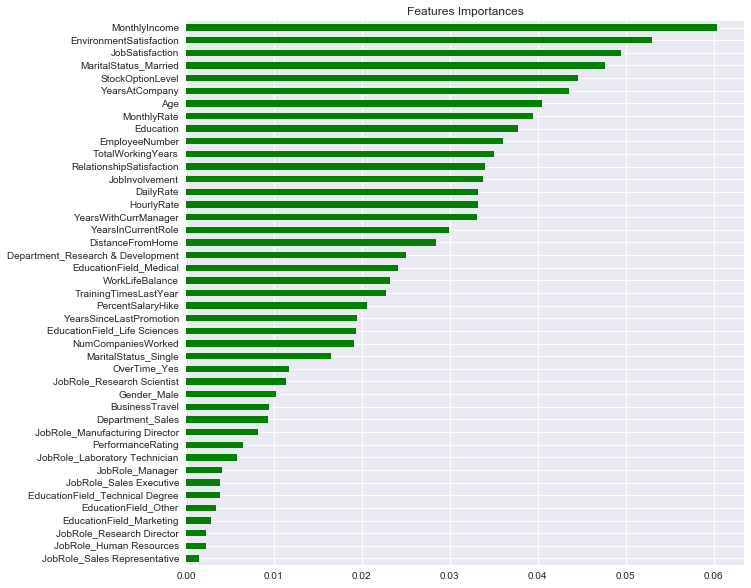

In [35]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X.columns.values)

# Sort importances
importances_sorted = importances.sort_values() #ascending=False

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='green',figsize=(10,10))
plt.title('Features Importances')
plt.show()

In [ ]:
print(importances_sorted*100)

# Ada Boost -- Adaptive Boosting

In [36]:
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt3 = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt3, n_estimators=100, random_state=1)

In [37]:
# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [38]:
from sklearn.metrics import roc_auc_score
# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.74


In [39]:
# Predict the test set labels
y_pred1 = ada.predict(X_test)

# Evaluate acc_test
ada_test = accuracy_score(y_test, y_pred1)
print('Test set accuracy of ADA: {:.2f}'.format(ada_test))

Test set accuracy of bc: 0.80


# Gradient Boosting

In [41]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate gb
gb = GradientBoostingClassifier(max_depth=3, 
            n_estimators=200)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred2 = gb.predict(X_test)

# Evaluate acc_test
gb_test = accuracy_score(y_test, y_pred2)
print('Test set accuracy of GB: {:.2f}'.format(gb_test))

Test set accuracy of bc: 0.84


# Stochastic Gradient Boosting

In [43]:
# Instantiate sgbr
sgbr = GradientBoostingClassifier(max_depth=3, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

# Fit gb to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred3 = sgbr.predict(X_test)

# Evaluate acc_test
sgbr_test = accuracy_score(y_test, y_pred3)
print('Test set accuracy of SGBR: {:.2f}'.format(sgbr_test))

Test set accuracy of bc: 0.85


In [61]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       370
           1       0.56      0.39      0.46        71

   micro avg       0.85      0.85      0.85       441
   macro avg       0.73      0.67      0.69       441
weighted avg       0.84      0.85      0.84       441

[[348  22]
 [ 43  28]]
